Entre com o coeficiente angular, a: 2
Entre com o intercepto, b: 3


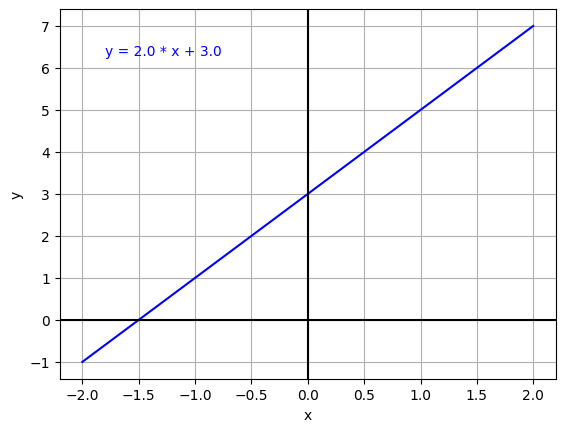

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
a = float(input('Entre com o coeficiente angular, a: '))
b = float(input('Entre com o intercepto, b: '))
x = np.linspace(-2,2,50)
y = a * x + b
txt = f'y = {a} * x + {b}'
plt.plot(x, y, c='b')
plt.text(x=-1.8, y=max(y)*.9, s=txt, c='b')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving combustivel_e_temperatura.npy to combustivel_e_temperatura.npy


R² = 0.9284264097087729
Temperatura do motor com 8 litros injetado: 121.5°C


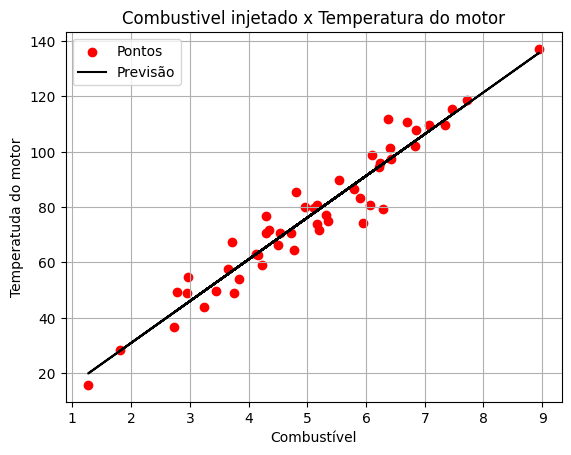

In [ ]:
dados = np.load("combustivel_e_temperatura.npy")
x = dados[0]
y = dados[1]
X = np.vstack((np.ones(len(x)), x)).T
betas, res, _, _ = np.linalg.lstsq(X,y, rcond=None)
beta0, beta1 = betas
y_prev = beta0 + beta1 * x
y_medio = np.mean(y)
tss = np.sum((y - y_medio)**2)
rss = np.sum((y - y_prev) **2)
r2 = 1 - rss / tss

plt.scatter(x,y, label='Pontos', color='r')
plt.plot(x, y_prev, label='Previsão', color='k')
plt.legend()
plt.title('Combustivel injetado x Temperatura do motor')
plt.xlabel('Combustível')
plt.ylabel('Temperatura do motor')
plt.grid()

print(f'R² = {r2}')
print(f'Temperatura do motor com 8 litros injetado: {beta0 + beta1 * 8:.1f}°C')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dados_descarbonizacao.csv to dados_descarbonizacao.csv


0.9591721606938287


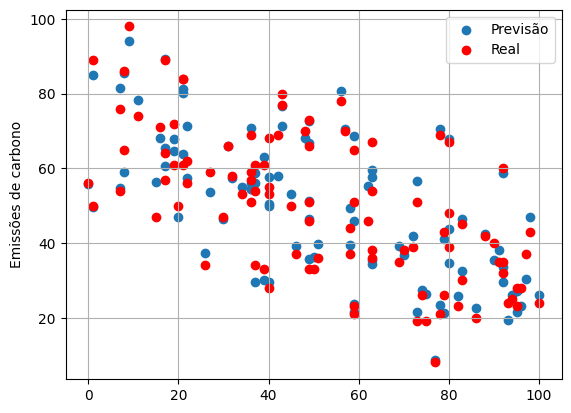

In [ ]:
#Regressao linear multipla
dados = np.genfromtxt('dados_descarbonizacao.csv', delimiter=',', skip_header=1)
dados = dados.T
x = dados[:-1]
y = dados[-1]
X = np.vstack((np.ones(len(x[0])), x)).T
betas, res, _, _ = np.linalg.lstsq(X,y, rcond=None)
beta0, beta1, beta2, beta3, beta4 = betas

y_prev = beta0 + beta1 * x[0] + beta2 * x[1] + beta3 * x[2] + beta4 * x[3]
y_medio = np.mean(y)
tss = np.sum((y - y_medio)**2)
rss = np.sum((y - y_prev) **2)
r2 = 1 - rss / tss

plt.scatter(x[2], y_prev, label='Previsão')
plt.scatter(x[2], y, label='Real', color = 'r')
plt.ylabel('Emissões de carbono')
plt.legend()
plt.grid()
print(r2)

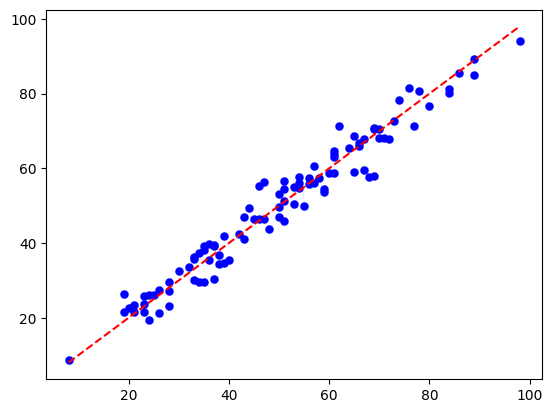

In [ ]:
plt.scatter(y, y_prev, color='blue', label='Predictions vs. Real', linewidth=0.1)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')